In [118]:
import numpy as np
import statistics as st
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import auc
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelEncoder

In [119]:
cd E:\Python\Datasets\CR7

E:\Python\Datasets\CR7


In [120]:
data = pd.read_csv('data1.csv')
data.head()

,location_x,location_y,remaining_min,power_of_shot,game_season,lat/lng,home/away,remaining_sec,shot_id_number,distance_of_shot,is_goal,area_of_shot,shot_basics,range_of_shot,type_of_shot,type_of_combined_shot
0,167.0,72.0,10.0,1.0,2000-01,"45.539131, -122.651648",MANU @ POR,27.0,1.0,38.0,NaN,Right Side(R),Mid Range,16-24 ft.,shot - 30,NaN
1,-157.0,0.0,10.0,1.0,2000-01,"45.539131, -122.651648",MANU @ POR,22.0,2.0,35.0,0.0,Left Side(L),Mid Range,8-16 ft.,shot - 45,NaN
2,-101.0,135.0,7.0,1.0,2000-01,"45.539131, -122.651648",NaN,45.0,3.0,36.0,1.0,Left Side Center(LC),Mid Range,16-24 ft.,shot - 25,NaN
3,138.0,175.0,6.0,1.0,2000-01,"45.539131, -122.651648",MANU @ POR,52.0,4.0,42.0,0.0,Right Side Center(RC),Mid Range,16-24 ft.,NaN,shot - 3
4,0.0,0.0,NaN,2.0,2000-01,"45.539131, -122.651648",MANU @ POR,19.0,5.0,20.0,1.0,Center(C),Goal Area,Less Than 8 ft.,NaN,shot - 1


In [121]:
data = data.drop(['shot_basics'],axis =1)

As is seems, I have dropped some duplicate features from the data itself

Checking the unique values of categorical features as well as cheking if there's any NaN values.

In [122]:
print('unique values in power_of_shot:')
print(data['power_of_shot'].unique())
print()
print('unique values in game_season:')
print(data['game_season'].unique())
print()
print('unique values in area_of_shot:')
print(data['area_of_shot'].unique())
print()
# print('unique values in shot_basics:')
# print(data['shot_basics'].unique())
# print()
print('unique values in range_of_shot:')
print(data['range_of_shot'].unique())
print()
print('unique values in type_of_shot:')
print(data['type_of_shot'].unique())
print()
print('unique values in type_of_combined_shot:')
print(data['type_of_combined_shot'].unique())
print()

unique values in power_of_shot:
[ 1.  2.  3. nan  4.  5.  6.  7.]

unique values in game_season:
['2000-01' nan '2001-02' '2002-03' '2003-04' '2004-05' '2005-06' '2006-07'
 '2007-08' '2008-09' '2009-10' '2010-11' '2011-12' '2012-13' '2013-14'
 '2014-15' '2015-16' '1996-97' '1997-98' '1998-99' '1999-00']

unique values in area_of_shot:
['Right Side(R)' 'Left Side(L)' 'Left Side Center(LC)'
 'Right Side Center(RC)' 'Center(C)' nan 'Mid Ground(MG)']

unique values in range_of_shot:
['16-24 ft.' '8-16 ft.' 'Less Than 8 ft.' '24+ ft.' nan 'Back Court Shot']

unique values in type_of_shot:
['shot - 30' 'shot - 45' 'shot - 25' nan 'shot - 17' 'shot - 36'
 'shot - 44' 'shot - 7' 'shot - 12' 'shot - 6' 'shot - 4' 'shot - 20'
 'shot - 24' 'shot - 54' 'shot - 42' 'shot - 34' 'shot - 39' 'shot - 1'
 'shot - 37' 'shot - 14' 'shot - 21' 'shot - 9' 'shot - 0' 'shot - 2'
 'shot - 22' 'shot - 15' 'shot - 10' 'shot - 49' 'shot - 51' 'shot - 52'
 'shot - 46' 'shot - 32' 'shot - 11' 'shot - 56' 'shot - 47

Findig the category wise frequency of some features for which I'll be replacing missing values with the most frequent category

In [123]:
print(data['area_of_shot'].value_counts())
print()
# print(data['shot_basics'].value_counts())
# print()
print(data['range_of_shot'].value_counts())
print()
print(data['type_of_shot'].value_counts())
print()
print(data['type_of_combined_shot'].value_counts())
print()

Center(C)                12761
Right Side Center(RC)     4562
Right Side(R)             4370
Left Side Center(LC)      3848
Left Side(L)              3573
Mid Ground(MG)              81
Name: area_of_shot, dtype: int64

Less Than 8 ft.    8933
16-24 ft.          7892
8-16 ft.           6290
24+ ft.            5937
Back Court Shot      81
Name: range_of_shot, dtype: int64

shot - 39    1445
shot - 36    1292
shot - 4     1129
shot - 15     701
shot - 38     676
shot - 44     609
shot - 43     400
shot - 17     382
shot - 12     361
shot - 52     338
shot - 46     320
shot - 32     303
shot - 56     290
shot - 49     222
shot - 31     218
shot - 1      213
shot - 27     203
shot - 10     197
shot - 51     196
shot - 55     196
shot - 26     194
shot - 18     185
shot - 29     182
shot - 24     179
shot - 9      174
shot - 16     173
shot - 22     173
shot - 20     169
shot - 19     168
shot - 54     168
shot - 21     165
shot - 3      165
shot - 48     163
shot - 5      160
shot - 2     

Filling the missing values with

1. Avg value of the feature

2. most frequent value of the feature (for categorical features)

3. Previous value of the feature (such as for game_season - missing value is most probably be the previous value because of the structure and arrangement of data)

Depending on the feature and its characteristics

In [124]:
data['location_x'] = data['location_x'].fillna(value = np.mean(data['location_x']))
data['location_y'] = data['location_y'].fillna(value = np.mean(data['location_y']))
data['remaining_min'] = data['remaining_min'].fillna(value = round(np.mean(data['remaining_min'])))
data['power_of_shot'] = data['power_of_shot'].fillna(value = round(np.mean(data['power_of_shot'])))
data['game_season'] = data['game_season'].fillna(method = 'ffill')                                    # Here we shall not use most frequent value as the season is just as that of previous one
data['home/away'] = data['home/away'].fillna(method = 'ffill')  
data['lat/lng'] = data['lat/lng'].fillna(method = 'ffill')   
data['remaining_sec'] = data['remaining_sec'].fillna(value = round(np.mean(data['remaining_sec'])))
data['shot_id_number'] = data['shot_id_number'].interpolate()
data['distance_of_shot'] = data['distance_of_shot'].fillna(value = round(np.mean(data['distance_of_shot'])))
data['area_of_shot'] = data['area_of_shot'].fillna(value = st.mode(data['area_of_shot']))
# data['shot_basics'] = data['shot_basics'].fillna(value = st.mode(data['shot_basics']))
data['range_of_shot'] = data['range_of_shot'].fillna(value = st.mode(data['range_of_shot']))
data['type_of_shot'] = data['type_of_shot'].fillna(value = 'shot - 39')
data['type_of_combined_shot'] = data['type_of_combined_shot'].fillna(value = 'shot - 3')
data.isnull()

,location_x,location_y,remaining_min,power_of_shot,game_season,lat/lng,home/away,remaining_sec,shot_id_number,distance_of_shot,is_goal,area_of_shot,range_of_shot,type_of_shot,type_of_combined_shot
0,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
5,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
6,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
7,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False
8,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
9,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False



Now that we have cleaned the data and filled the missing values, the most important precedure before building a model is
#### Feature Engineering

In [134]:
dfDummies = pd.get_dummies(data[['area_of_shot','game_season', 'lat/lng','range_of_shot', 'type_of_shot', 'type_of_combined_shot']])
data = pd.concat([data, dfDummies], axis=1)

In [91]:
#data.drop(['area_of_shot','shot_basics','game_season', 'range_of_shot', 'type_of_shot', 'type_of_combined_shot'], axis=1, inplace=True)

In [126]:
h_a = []
for i in data['home/away']:
    a = i.split()
    if '@' in a:
        h_a.append(1) 
    else:
        h_a.append(0) 
data['home/away'] = h_a

In [127]:
class MultiColumnLabelEncoder:
    def __init__(self,columns = None):
        self.columns = columns # array of column names to encode

    def fit(self,X,y=None):
        return self # not relevant here

    def transform(self,X):
        '''
        Transforms columns of X specified in self.columns using
        LabelEncoder(). If no columns specified, transforms all
        columns in X.
        '''
        output = X.copy()
        if self.columns is not None:
            for col in self.columns:
                output[col] = LabelEncoder().fit_transform(output[col])
        else:
            for colname,col in output.iteritems():
                output[colname] = LabelEncoder().fit_transform(col)
        return output

    def fit_transform(self,X,y=None):
        return self.fit(X,y).transform(X)

data = MultiColumnLabelEncoder(columns = ['game_season','area_of_shot','lat/lng','range_of_shot','type_of_shot','type_of_combined_shot']).fit_transform(data)

In [94]:
data.describe()

,location_x,location_y,remaining_min,power_of_shot,game_season,lat/lng,home/away,remaining_sec,shot_id_number,distance_of_shot,is_goal,area_of_shot,range_of_shot,type_of_shot,type_of_combined_shot
count,30697.000000,30697.000000,30697.000000,30697.000000,30697.000000,30697.000000,30697.000000,30697.000000,30697.000000,30697.000000,24429.000000,30697.000000,30697.000000,30697.000000,30697.000000
mean,7.383876,91.126933,4.889175,2.542626,9.409714,24.263446,0.512754,28.312278,15349.000000,33.425970,0.445331,1.672313,1.978956,30.827442,3.045021
std,107.607032,85.448760,3.363641,1.130414,4.863855,10.346286,0.499845,17.011159,8861.604943,9.127903,0.497013,1.937777,1.609932,10.552407,0.451368
min,-250.000000,-44.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,20.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,-59.000000,7.000000,2.000000,2.000000,5.000000,17.000000,0.000000,14.000000,7675.000000,26.000000,0.000000,0.000000,0.000000,32.000000,3.000000
50%,0.000000,84.000000,5.000000,3.000000,9.000000,31.000000,1.000000,28.000000,15349.000000,34.000000,0.000000,1.000000,2.000000,33.000000,3.000000
75%,90.000000,156.000000,8.000000,3.000000,13.000000,31.000000,1.000000,42.000000,23023.000000,40.000000,1.000000,4.000000,4.000000,33.000000,3.000000
max,248.000000,791.000000,11.000000,7.000000,19.000000,37.000000,1.000000,59.000000,30697.000000,99.000000,1.000000,5.000000,4.000000,56.000000,5.000000


C:\Users\Saurabh Wani\Anaconda3\lib\site-packages\numpy\lib\histograms.py:754: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
C:\Users\Saurabh Wani\Anaconda3\lib\site-packages\numpy\lib\histograms.py:755: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


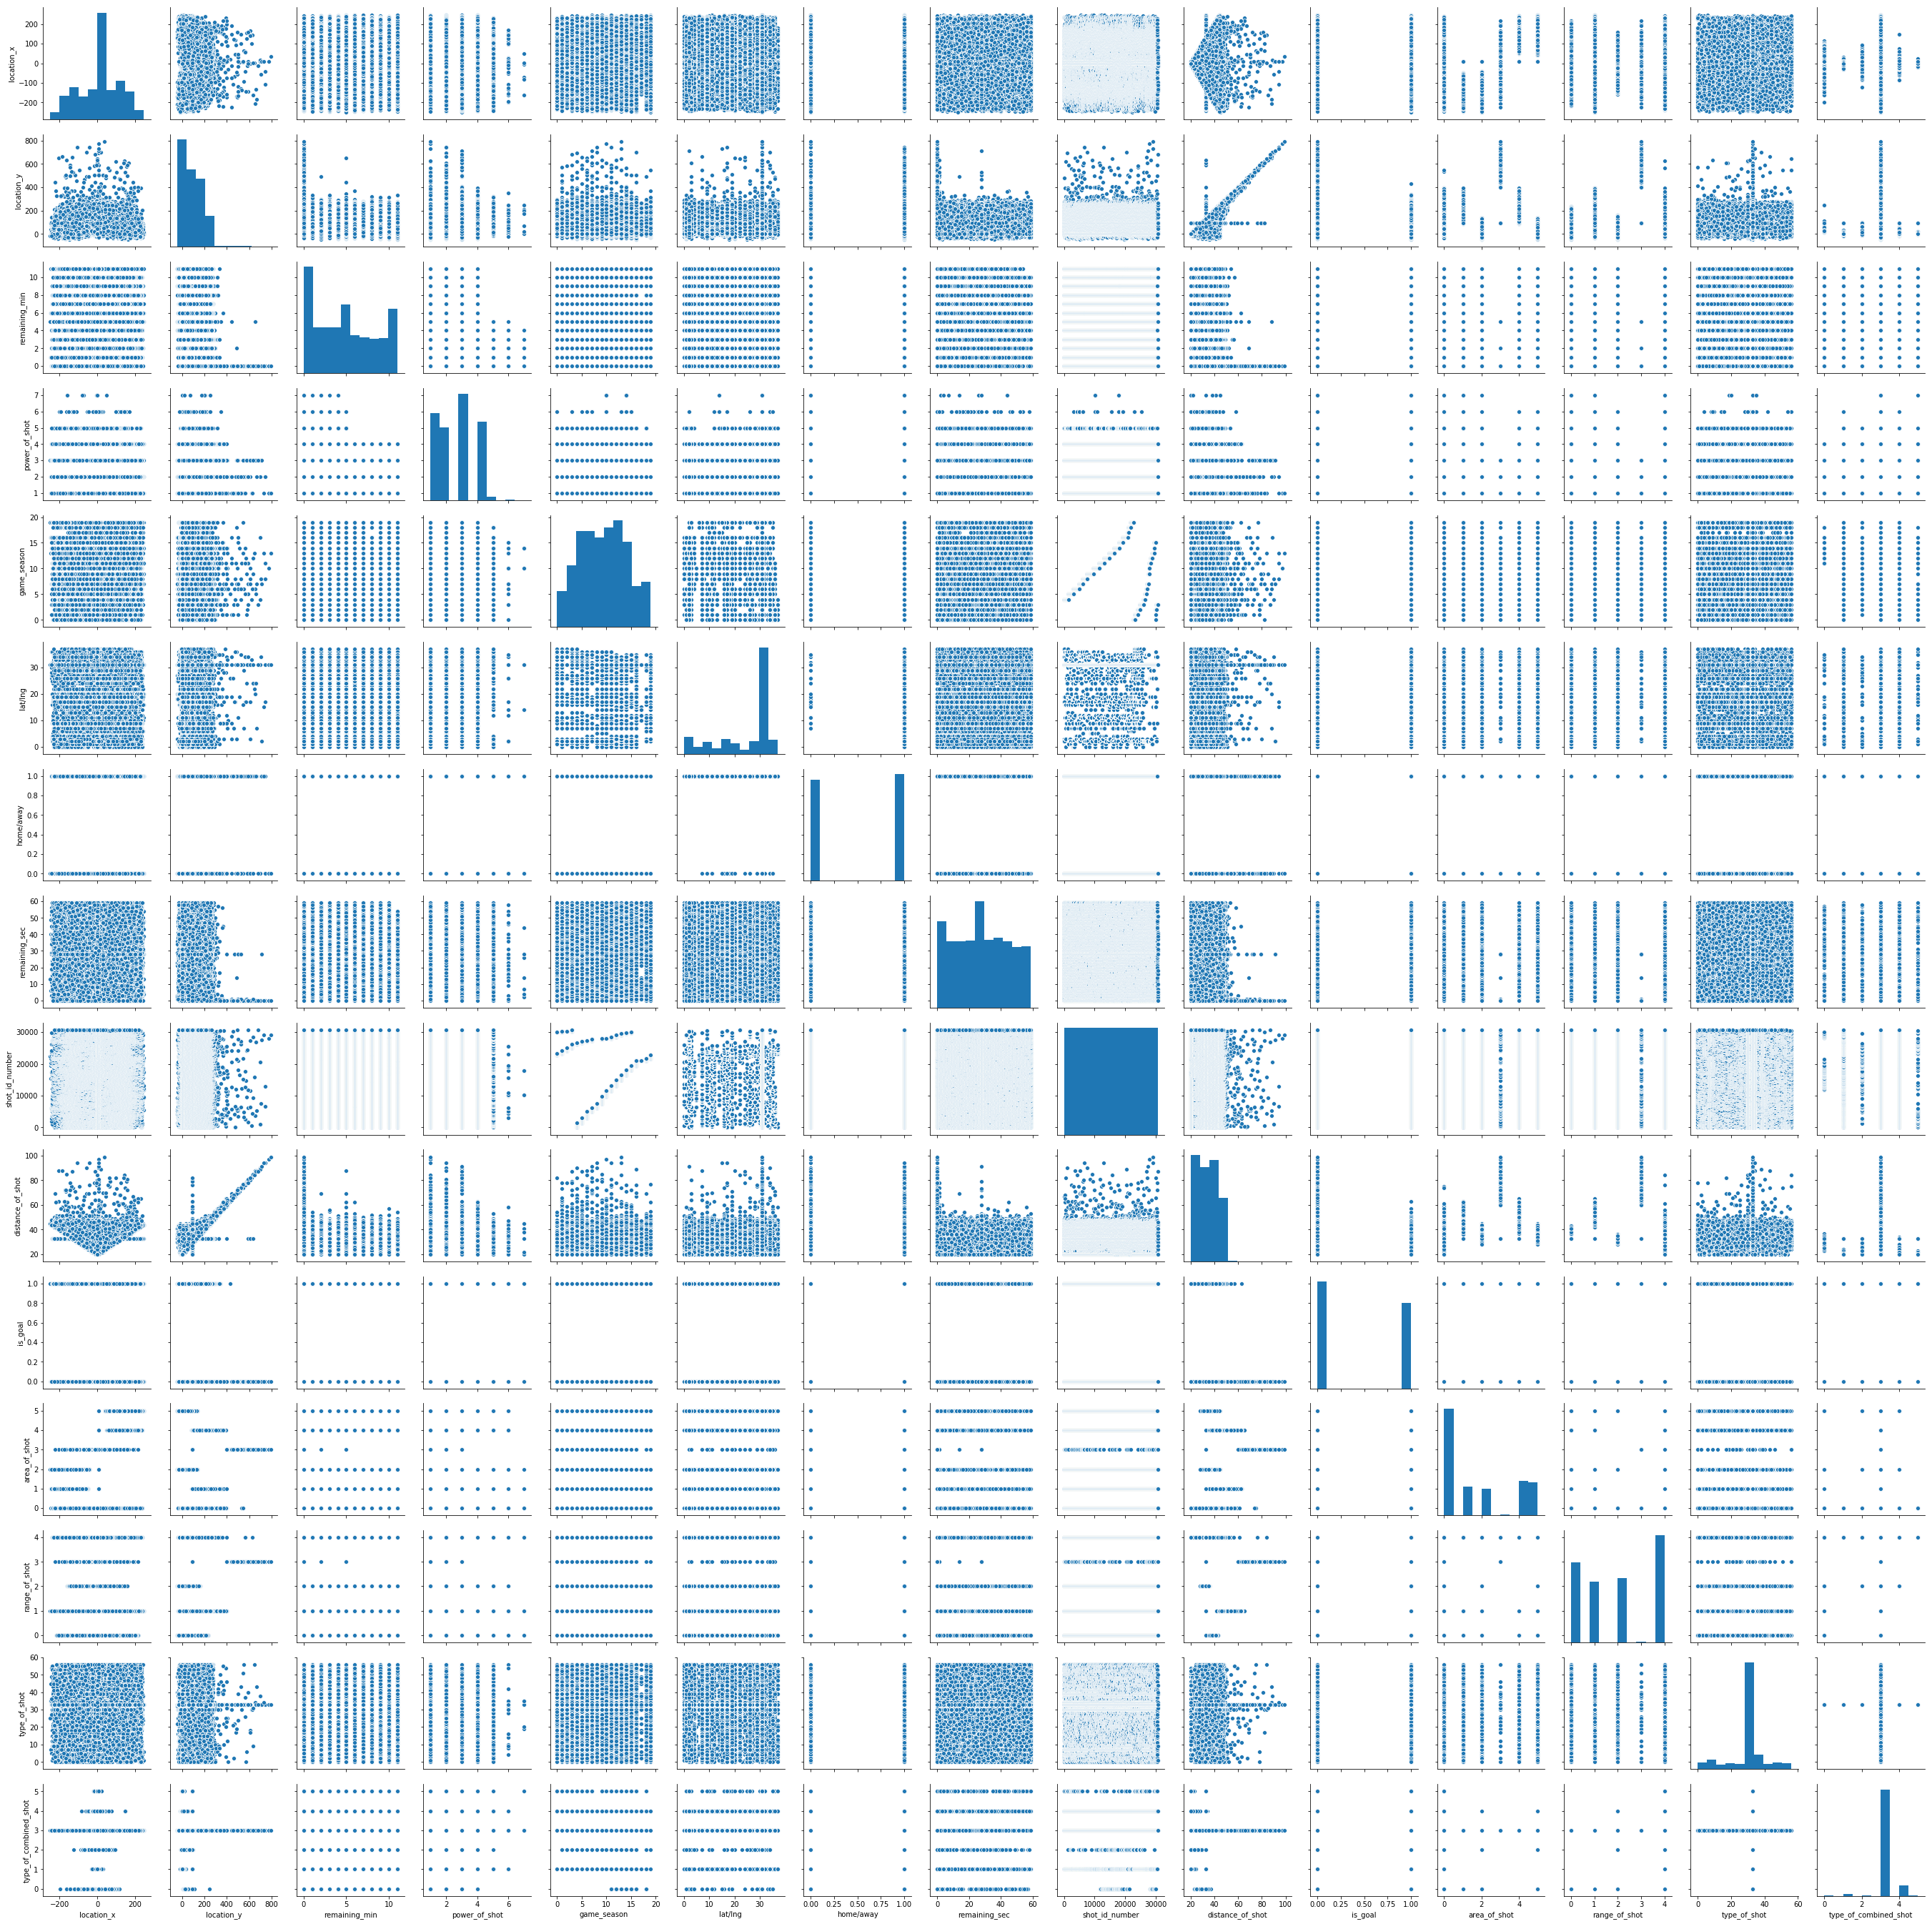

In [96]:
sns.pairplot(data)

From the above pairplots there are a few noticeable things

1. Distance of shot is somehow linearly correlated with location_y

2. No feature is highly correlated to target variable as compared to range_of_shot

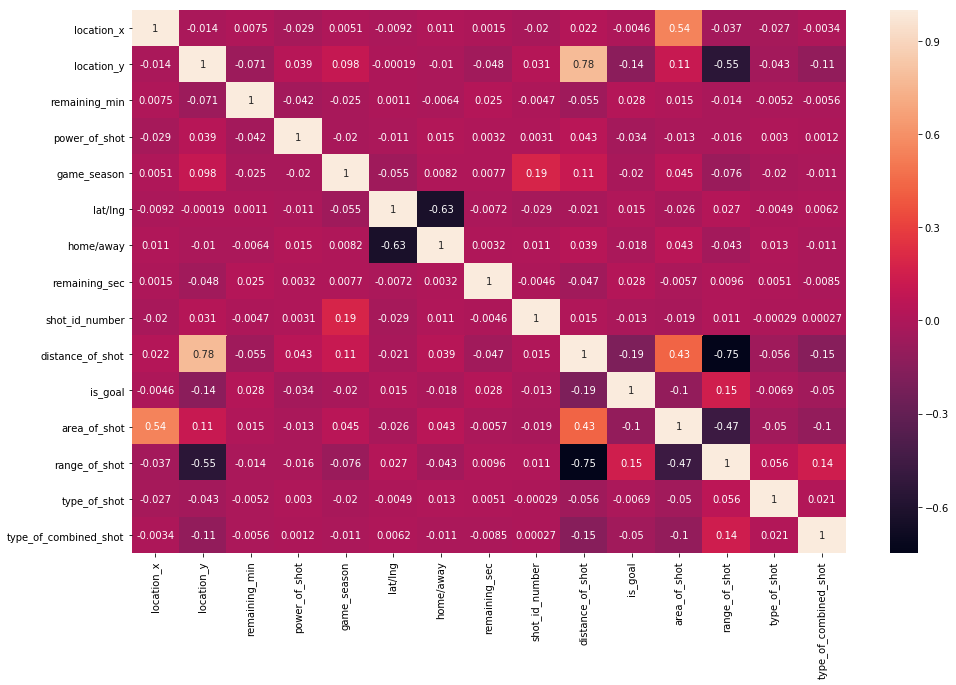

In [95]:
Var_Corr = data.corr()
plt.figure(figsize = (16,10))
sns.heatmap(Var_Corr, xticklabels=Var_Corr.columns, yticklabels=Var_Corr.columns, annot=True)

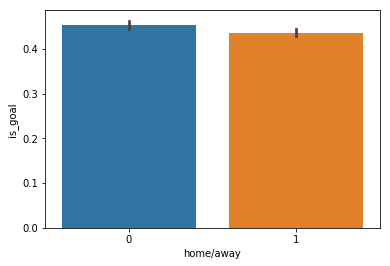

In [102]:
sns.barplot(data['home/away'],data['is_goal'])

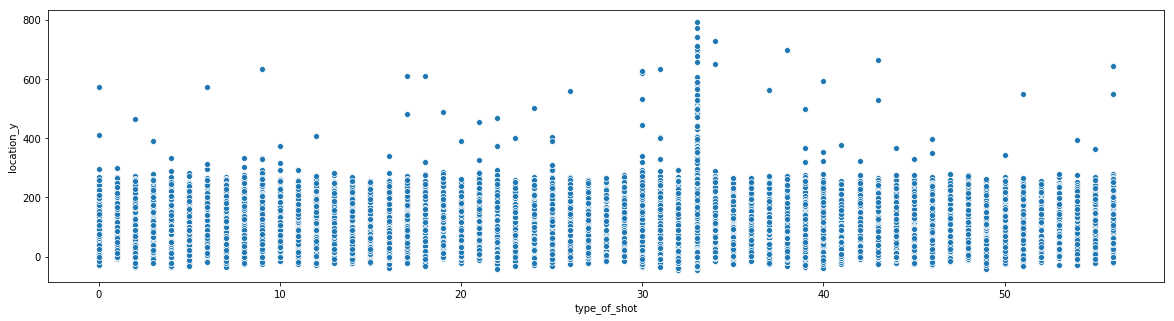

In [101]:
plt.figure(figsize = (20,5))
sns.scatterplot(data['type_of_shot'],data['location_y'])

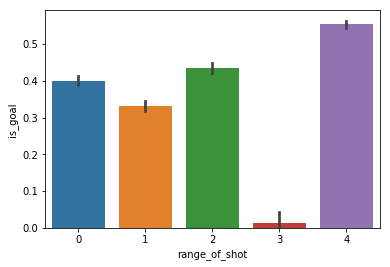

In [113]:
sns.barplot(data['range_of_shot'],data['is_goal'])

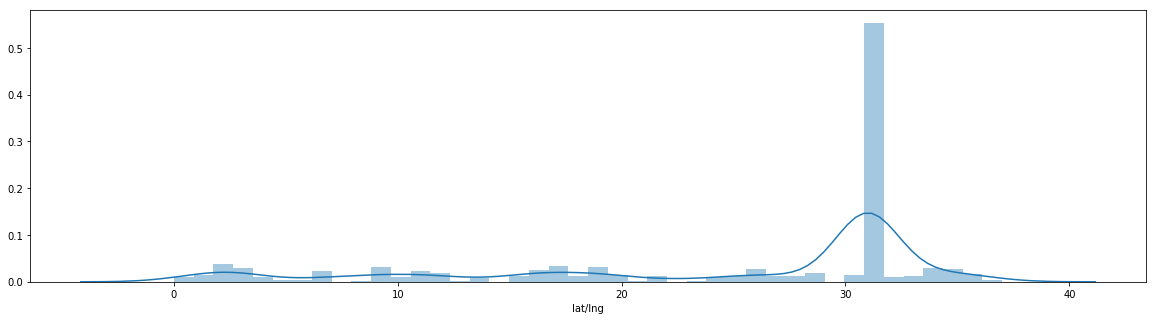

In [115]:
plt.figure(figsize = (20,5))
sns.distplot(data['lat/lng'])

Using Cross-Validation for reference testing

In [128]:
data['goal'] = data['is_goal'].isnull().values*1
data_train = data[pd.notnull(data['is_goal'])]
new_data = pd.read_csv('sample_submission.csv')
data_test = data[data.shot_id_number.isin(new_data['shot_id_number'])]

In [129]:
features = data_train[data_train.columns.difference(['is_goal'])]
label = data_train['is_goal']

model = GradientBoostingClassifier(learning_rate = 0.2,n_estimators = 150)
x_train, x_test, y_train, y_test = train_test_split(features,label,test_size=0.2,random_state=100)
model.fit(x_train, y_train)
pred_model = model.predict(x_test)
acc_model = accuracy_score(y_true = y_test, y_pred = pred_model)*100
print("Accuracy of model: " + str(acc_model) + " %")

Accuracy of model: 63.99918133442489 %


In [130]:
features = data_train[data_train.columns.difference(['is_goal'])]
label = data_train['is_goal']

model = RandomForestClassifier(n_estimators = 100)
x_train, x_test, y_train, y_test = train_test_split(features,label,test_size=0.2,random_state=100)
model.fit(x_train, y_train)
pred_model = model.predict(x_test)
acc_model = accuracy_score(y_true = y_test, y_pred = pred_model)*100
print("Accuracy of model: " + str(acc_model) + " %")

Accuracy of model: 62.2799836266885 %


In [131]:
features = data_train[data_train.columns.difference(['is_goal'])]
label = data_train['is_goal']

model = AdaBoostClassifier(learning_rate = 0.4,n_estimators = 150)
x_train, x_test, y_train, y_test = train_test_split(features,label,test_size=0.2,random_state=100)
sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)
model.fit(x_train, y_train)
pred_model = model.predict(x_test)
acc_model = accuracy_score(y_true = y_test, y_pred = pred_model)*100
print("Accuracy of model: " + str(acc_model) + " %")

C:\Users\Saurabh Wani\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:625: DataConversionWarning: Data with input dtype uint8, int32, int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\Users\Saurabh Wani\Anaconda3\lib\site-packages\sklearn\base.py:462: DataConversionWarning: Data with input dtype uint8, int32, int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)
C:\Users\Saurabh Wani\Anaconda3\lib\site-packages\ipykernel_launcher.py:8: DataConversionWarning: Data with input dtype uint8, int32, int64, float64 were all converted to float64 by StandardScaler.
  


Accuracy of model: 62.66884977486696 %


In [132]:
features = data_train[data_train.columns.difference(['is_goal'])]
label = data_train['is_goal']

model = LogisticRegression()
x_train, x_test, y_train, y_test = train_test_split(features,label,test_size=0.2,random_state=100)
sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)
model.fit(x_train, y_train)
pred_model = model.predict(x_test)
acc_model = accuracy_score(y_true = y_test, y_pred = pred_model)*100
print("Accuracy of model: " + str(acc_model) + " %")

C:\Users\Saurabh Wani\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:625: DataConversionWarning: Data with input dtype uint8, int32, int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\Users\Saurabh Wani\Anaconda3\lib\site-packages\sklearn\base.py:462: DataConversionWarning: Data with input dtype uint8, int32, int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)
C:\Users\Saurabh Wani\Anaconda3\lib\site-packages\ipykernel_launcher.py:8: DataConversionWarning: Data with input dtype uint8, int32, int64, float64 were all converted to float64 by StandardScaler.
  
C:\Users\Saurabh Wani\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


Accuracy of model: 62.095783872288166 %


Testing the model on test data

In [133]:
features_test = data_test[data_train.columns.difference(['is_goal'])]
model = GradientBoostingClassifier(learning_rate = 0.2,n_estimators = 150)
model.fit(features, label)
pred_model = model.predict(features_test)
np.savetxt('res.csv', pred_model, delimiter=",")